In [3]:
# Modules

import random
from tabulate import tabulate
import statistics
from scipy.stats import skew 
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np


In [1]:
# Functions

def outcome_list_coin_flips_num_heads(num_coin_tosses, n_trials):
    num_heads_outcome_list = list()
    for n in range(n_trials):
        sum_heads = 0
        for coin_toss_num in range(num_coin_tosses):
            sum_heads += random.choice([0,1])
        num_heads_outcome_list.append(sum_heads)
    return num_heads_outcome_list


def outcome_list_dice_sum_rolls(num_dice_rolls, n_trials):
    sum_rolls_outcome_list = list()
    for n in range(n_trials):
        sum_rolls = 0
        for dice_roll_num in range(num_dice_rolls):
            sum_rolls += random.randrange(1,7)
        sum_rolls_outcome_list.append(sum_rolls)
    return sum_rolls_outcome_list

 
    
def average_list(outcome_list):
    return sum(outcome_list) / len(outcome_list)
       


def avg_median_stdev_skewness(outcome_list):
    print('Average', average_list(outcome_list))
    print('Median', statistics.median(outcome_list))
    print('St.Dev', statistics.stdev(outcome_list))
    print('Skewness', skew(outcome_list))

    
def outcome_list_to_prob_mass(outcome_list, proportion=1):
    x = []
    y = []
    length = len(outcome_list)
    
    unique_outcomes = list(set(outcome_list))
    
    # for result in range(min(outcome_list), max(outcome_list) + 1):
    for result in unique_outcomes:
        num_counts = outcome_list.count(result)
        x.append(result)
        y.append(num_counts / length)
    if proportion != 1:
        y = [value * proportion for value in y]
    return x, y


def plot_prob_mass(x, y, title, xlabel, ylabel, save=False, default_x_ticks=False, no_labels=False):
    plt.style.use('seaborn')
    plt.style.use('seaborn-talk')
    if default_x_ticks == False:
        plt.xticks(x)
    plt.bar(x, y)
    # num_string = f'{n_trials:,}'
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    if no_labels == False:
        for a, b in zip(x, y):
            if b != 0:
                plt.text(a, b, "{:0.1%}".format(b), ha='center', va='bottom', size=11)
    
    if save == True:
        plt.savefig(title + '.png', dpi=300)
    plt.show()
    
    
def outcome_list_red_roulette_martingale(n_trials, max_loss, max_win, narrate=False):
    p_red = 18 / 38
    net_gain_outcome_list = list()
    game_num = 1
    for n in range(n_trials):
        net_gain = 0
        current_bet = 1  # initialize bet to 1 dollar
        if narrate == True:
            print('GAME', game_num)
        game_num += 1
        while net_gain >= max_loss and net_gain < max_win:
            if narrate == True:
                print('net gain', net_gain, ', bet', current_bet, end=', ')
            roulette_outcome = random.randrange(1, 39)
            # if the roulette comes up red
            if roulette_outcome <= 18:
                if narrate == True:
                    print('win, go up', current_bet * 2)
                net_gain += current_bet
                current_bet = 1
            # if the roulette comes up not red
            else:
                if narrate == True:
                    print('lose, go down', current_bet)
                net_gain -= current_bet
                current_bet *= 2
        net_gain_outcome_list.append(net_gain)
        if narrate == True:
            print('net gain', net_gain, '\n')
    return net_gain_outcome_list


def standardize_roulette_game(roulette_outcome_list, loss_amount, win_amount):
    standardized_outcome_list = list()
    for outcome in roulette_outcome_list:
        if outcome >= win_amount:
            standardized_outcome_list.append(1)
        elif outcome <= loss_amount:
            standardized_outcome_list.append(0)
    return standardized_outcome_list


def outcome_list_coin_toss_payout_game(n_trials, number_of_plays):
    payout_outcome_list = []
    for n in range(n_trials):
        payout = 0
        for play_num in range(number_of_plays):
            coin_toss = 0
            coin_toss_num = 0
            while coin_toss == 0:
                coin_toss = random.choice([0, 1])
                coin_toss_num += 1
            payout += 2 ** coin_toss_num 
        payout_outcome_list.append(payout / number_of_plays)
    return payout_outcome_list


def plot_prob_mass_coin_toss(N, game, proportion, title, xlabel, no_labels=False):
    game.sort()
    game_most = game[:(-int(N * (1 - proportion)))]
    hist_x_game_most, hist_y__game_most = outcome_list_to_prob_mass(game_most, proportion)
    plot_prob_mass(hist_x_game_most, hist_y__game_most, title, xlabel, 'Probability', default_x_ticks=True, no_labels=no_labels)
    

def coin_toss_game_median_payouts(n_trials, max_num_plays, interval=1, min_num_plays=1):
    median_list = list()
    play_num_list = list()
    for play_num in range(min_num_plays, max_num_plays + 1, interval):
        coin_toss_outcomes = outcome_list_coin_toss_payout_game(n_trials, play_num)
        play_num_list.append(play_num)
        median_list.append(statistics.median(coin_toss_outcomes))
    return play_num_list, median_list

## 1. 
Let X be the number of heads in three coin tosses. The coins are assumed fair. 

a. What is the probability mass function of X?

b. Verify that this probability mass function satisfy the two conditions.


In [99]:
N = 10 ** 6
three_tosses_num_heads = outcome_list_coin_flips_num_heads(3, N)

In [100]:
avg_median_stdev_skewness(three_tosses_num_heads)

Average 1.500335
Median 2.0
St.Dev 0.8665394616897945
Skewness 0.0004581479921170409


In [101]:
hist_x_three_tosses_num_heads, hist_y_three_tosses_num_heads = outcome_list_to_prob_mass(three_tosses_num_heads)

## 1, a

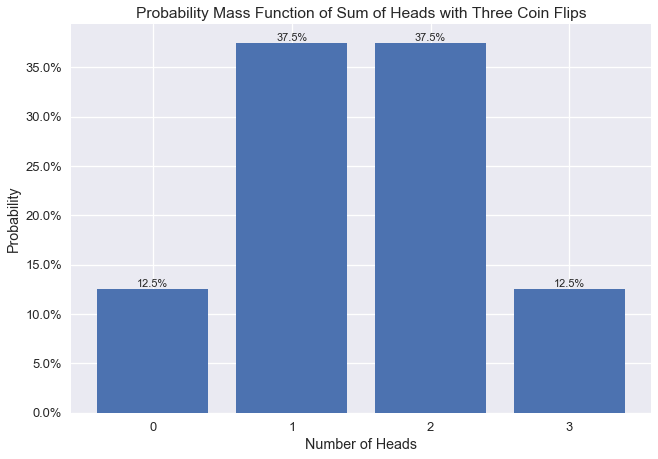

In [102]:
plot_prob_mass(hist_x_three_tosses_num_heads, hist_y_three_tosses_num_heads, \
               'Probability Mass Function of Sum of Heads with Three Coin Flips', 'Number of Heads', 'Probability')

## 1, b
The probability mass function shown above satisfies the two conditions in that probobability of x for each x in the sample space is positive, and the sum of the P(x) for all x in the sample space = 1.0.  

## 2

Suppose you roll three fair dice and calculate the sum of the three rolls. Is the sum more likely to be 9 or 10? Simulate the result of three dice rolls on https://www.random.org/dice/ for a few times and record your result. Describe how you would run a simulation to estimate the probability that the sum is 9 and the probability that the sum is 10.

In [111]:
N = 10 ** 6
three_rolls_sum_rolls = outcome_list_dice_sum_rolls(3, N)

In [112]:
avg_median_stdev_skewness(three_rolls_sum_rolls)

Average 10.505063
Median 11.0
St.Dev 2.9566049968746433
Skewness -0.0026062939023054734


In [113]:
hist_x_three_rolls_sum_rolls, hist_y_three_rolls_sum_rolls = outcome_list_to_prob_mass(three_rolls_sum_rolls)

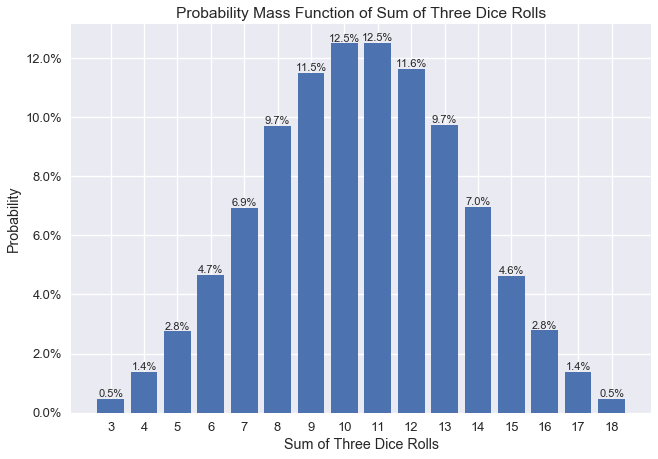

In [114]:
plot_prob_mass(hist_x_three_rolls_sum_rolls, hist_y_three_rolls_sum_rolls, \
               'Probability Mass Function of Sum of Three Dice Rolls', 'Sum of Three Dice Rolls', 'Probability')


The sum is more likely to be 10, which came up in 12.5% of the one million trials, than 9, which came in 11.5% of the one million trials.

One can run a simulation of this by essentially rolling three dice one million times and recording the sum of the dice rolls each time.

## 3
Read Section 1.1 (Simulation of Discrete Probabilities) in Introduction to Probability (page 1 to page 12). Don’t worry about the mentioned “programs.” Some of the simulations are reproduced in the R sample code if you want to play with the simulations.

## 4
Consider question 10 on page 14 of Introduction to Probability. (Note: in roulette, probability of red is 18/38). Are you more likely to win 5 dollars or to lose 100 dollars? Design a simulation to find the answer. For now, you don’t have to write the code for the simulation, but rather, you just need to describe how you plan to write the code.


*Another well-known gambling system is the martingale doubling system. Suppose that you are betting on red to turn up in roulette. Every time you win, bet 1 dollar next time. Every time you lose, double your previous bet. Suppose that you use this system until you have won at least 5 dollars or you have lost more than 100 dollars. Write a program to simulate this and play it a number of times and see how you do. In his book The Newcomes, W. M. Thackeray remarks “You have not played as yet? Do not do so; above all avoid a martingale if you do.” Was this good advice?*

In [4]:
outcome_list_red_roulette_martingale(8, -100, 5, narrate=True)

GAME 1
net gain 0 , bet 1, win, go up 2
net gain 1 , bet 1, win, go up 2
net gain 2 , bet 1, win, go up 2
net gain 3 , bet 1, win, go up 2
net gain 4 , bet 1, win, go up 2
net gain 5 

GAME 2
net gain 0 , bet 1, lose, go down 1
net gain -1 , bet 2, lose, go down 2
net gain -3 , bet 4, win, go up 8
net gain 1 , bet 1, win, go up 2
net gain 2 , bet 1, lose, go down 1
net gain 1 , bet 2, win, go up 4
net gain 3 , bet 1, lose, go down 1
net gain 2 , bet 2, win, go up 4
net gain 4 , bet 1, lose, go down 1
net gain 3 , bet 2, win, go up 4
net gain 5 

GAME 3
net gain 0 , bet 1, win, go up 2
net gain 1 , bet 1, lose, go down 1
net gain 0 , bet 2, lose, go down 2
net gain -2 , bet 4, win, go up 8
net gain 2 , bet 1, win, go up 2
net gain 3 , bet 1, win, go up 2
net gain 4 , bet 1, lose, go down 1
net gain 3 , bet 2, win, go up 4
net gain 5 

GAME 4
net gain 0 , bet 1, win, go up 2
net gain 1 , bet 1, lose, go down 1
net gain 0 , bet 2, lose, go down 2
net gain -2 , bet 4, win, go up 8
net gain

[5, 5, 5, 5, 5, 5, -124, 5]

In [5]:
roulette_game = outcome_list_red_roulette_martingale(100000, -100, 5)

In [6]:
avg_median_stdev_skewness(roulette_game)

Average -2.13026
Median 5.0
St.Dev 29.600309020605533
Skewness -3.9109970034491446


In [7]:
hist_x_roulette_game, hist_y_roulette_game = outcome_list_to_prob_mass(roulette_game)

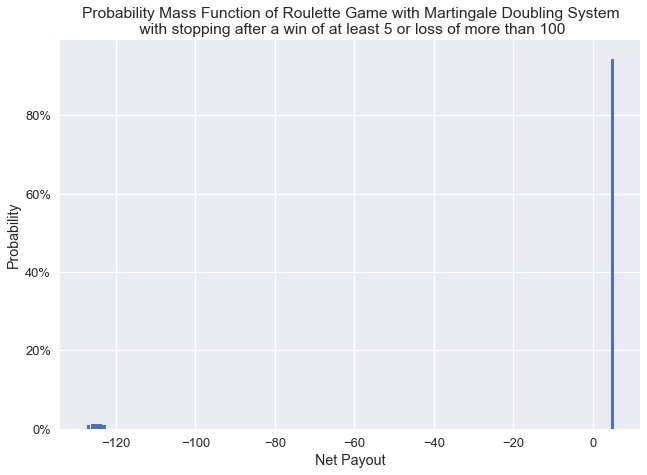

In [8]:
plot_prob_mass(hist_x_roulette_game, hist_y_roulette_game, \
               'Probability Mass Function of Roulette Game with Martingale Doubling System\n with stopping after a win of at least 5 or loss of more than 100', 'Net Payout', 'Probability', \
              default_x_ticks=True, no_labels=True)

In [9]:
standardized_roulette_game = standardize_roulette_game(roulette_game, -100, 5)

In [10]:
hist_x_standardized_roulette_game, hist_y_standardized_roulette_game = outcome_list_to_prob_mass(standardized_roulette_game)

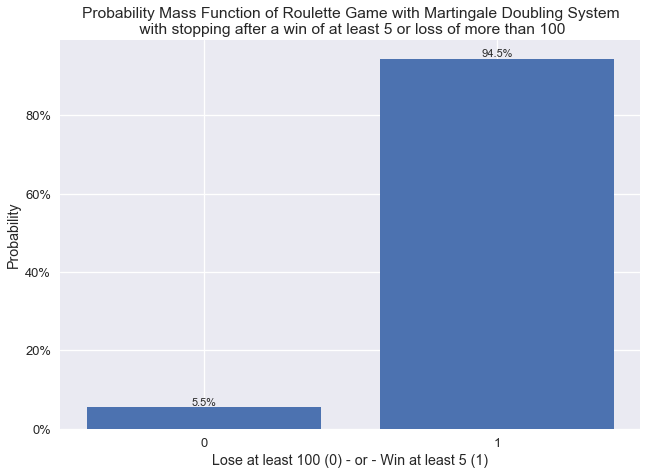

In [11]:
plot_prob_mass(hist_x_standardized_roulette_game, hist_y_standardized_roulette_game, \
               'Probability Mass Function of Roulette Game with Martingale Doubling System\n with stopping after a win of at least 5 or loss of more than 100', 'Lose at least 100 (0) - or - Win at least 5 (1)', 'Probability')

In [13]:
sum(roulette_game)

-213026

You're far more likely to win at least 5 dollars than lose at least 100 dollars. However, the losses when losing at least 100 dollars far outweigh the gains when winning at least 5 dollars. The average payout is -2.13 dollars per game, and as you can see in the simulation. One lost -213,026 dollars when playing the game 100,000 times. Thackeray gave good advice. 

## 5

Design a simulation to answer question 13 on page 14 of Introduction to Probability. For now, you don’t have to write the code for the simulation, but rather, you just need to describe how you plan to write the code.

*You are offered the following game. A fair coin will be tossed until the first time it comes up heads. If this occurs on the jth toss you are paid 2^j dollars. You are sure to win at least 2 dollars so you should be willing to pay to play this game—but how much? Few people would pay as much as 10 dollars to play this game. See if you can decide, by simulation, a reasonable amount that you would be willing to pay, per game, if you will be allowed to make a large number of plays of the game. Does the amount that you would be willing to pay per game depend upon the number of plays that you will be allowed?*

In [428]:
N_coin_toss_game = 100000
coin_toss_game = outcome_list_coin_toss_payout_game(n_trials=N_coin_toss_game, number_of_plays=1)

In [429]:
avg_median_stdev_skewness(coin_toss_game)
print('max', max(coin_toss_game))

Average 25.83024
Median 4.0
St.Dev 1962.485566529734
Skewness 220.63619965767035
max 524288.0


The median payout when playing the game once is 2 dollars, however the average is 23 dollars. Let's see what the probability masss function looks like.

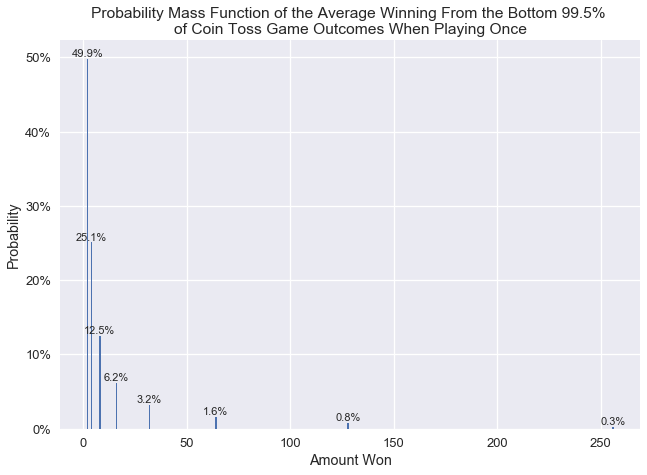

In [446]:
plot_prob_mass_coin_toss(N_coin_toss_game, coin_toss_game, 0.995, 'Probability Mass Function of the Average Winning From the Bottom 99.5% \nof Coin Toss Game Outcomes When Playing Once', 'Amount Won')

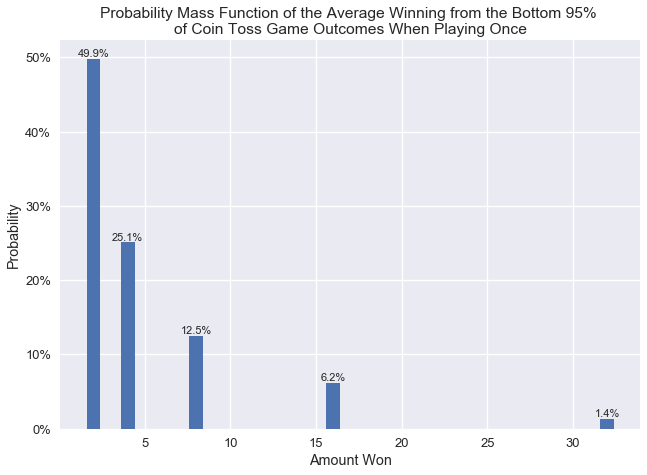

In [447]:
plot_prob_mass_coin_toss(N_coin_toss_game, coin_toss_game, 0.95, 'Probability Mass Function of the Average Winning from the Bottom 95% \nof Coin Toss Game Outcomes When Playing Once', 'Amount Won')

In [390]:
50 + 25.1 + 12.4

87.5

There's about an 87.5% chance of making less than 10 dollars playing this game once. Thus it doesn't make sense to pay 10 dollars in order to play the game once. 

In [456]:
coin_toss_game1 = outcome_list_coin_toss_payout_game(n_trials=N_coin_toss_game, number_of_plays=2)

In [457]:
avg_median_stdev_skewness(coin_toss_game1)

Average 17.43476
Median 3.0
St.Dev 403.26227622773825
Skewness 113.24206885029523


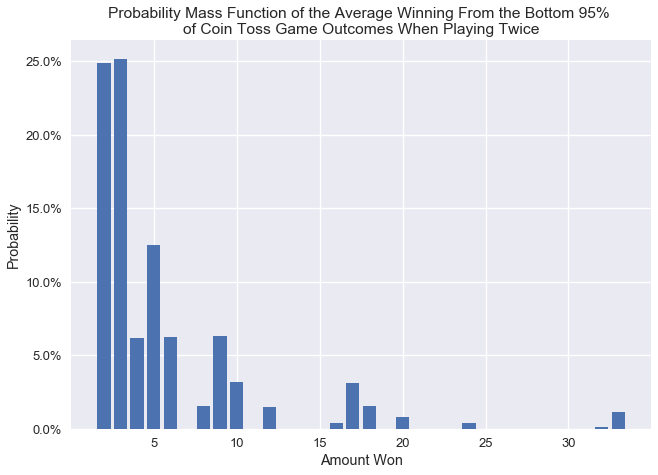

In [465]:
plot_prob_mass_coin_toss(N_coin_toss_game, coin_toss_game1, 0.95, 'Probability Mass Function of the Average Winning From the Bottom 95% \nof Coin Toss Game Outcomes When Playing Twice', 'Amount Won', no_labels=True)

In [452]:
coin_toss_game2 = outcome_list_coin_toss_payout_game(n_trials=N_coin_toss_game, number_of_plays=4)

In [453]:
avg_median_stdev_skewness(coin_toss_game2)

Average 18.258625
Median 4.5
St.Dev 472.8826804249695
Skewness 220.8302943249799


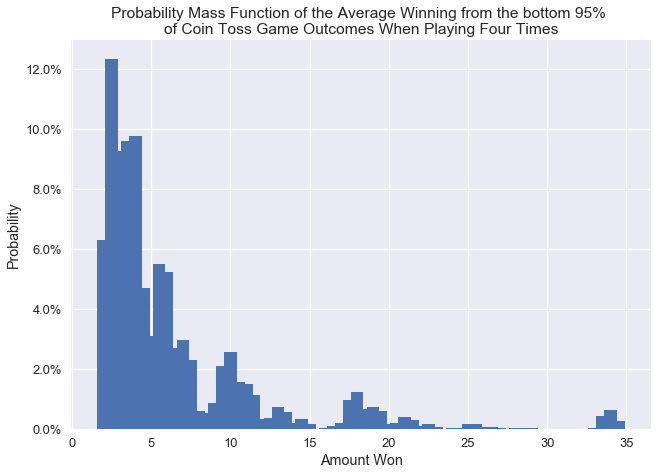

In [464]:
plot_prob_mass_coin_toss(N_coin_toss_game, coin_toss_game2, 0.95, 'Probability Mass Function of the Average Winning from the bottom 95% \nof Coin Toss Game Outcomes When Playing Four Times', 'Amount Won', no_labels=True)

We can see that as the number of plays increases, the median average winning increases and the histogram of the average winnings shifts to the right.

In [487]:
x, y = coin_toss_game_median_payouts(2000, 100)

Here we can see that the expected average win doesn't excede 10 dollars even at around 100 plays, however it is still increasing. 

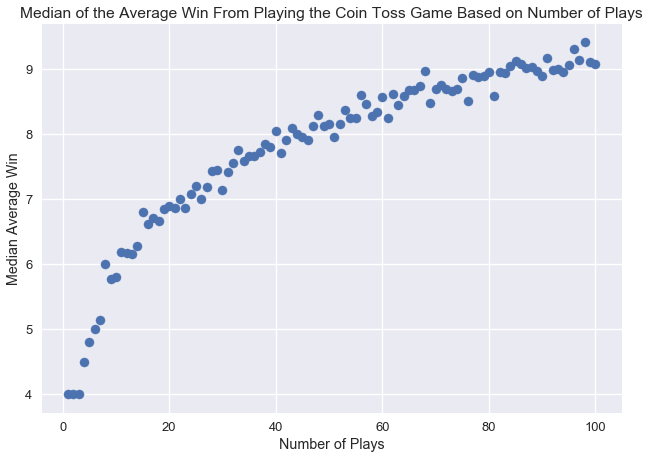

In [491]:
plt.scatter(x, y)
plt.title('Median of the Average Win From Playing the Coin Toss Game Based on Number of Plays')
plt.xlabel('Number of Plays')
plt.ylabel('Median Average Win')
plt.show()

In [489]:
x1, y1 = coin_toss_game_median_payouts(n_trials=2000, max_num_plays=500, interval=10)

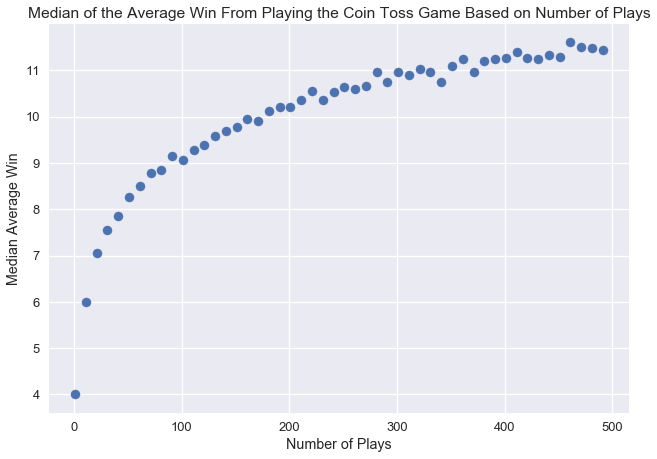

In [492]:
plt.scatter(x1, y1)
plt.title('Median of the Average Win From Playing the Coin Toss Game Based on Number of Plays')
plt.xlabel('Number of Plays')
plt.ylabel('Median Average Win')
plt.show()

Here we can see that the expected win does indeed cross over 10 dollars at about 160 plays, thus it makes sense to pay 10 dollars to play if one can play about 160 times. So yes, the amount that one would be willing to pay per game does depend upon the number of plays that one is allowed.

In [498]:
x2, y2 = coin_toss_game_median_payouts(n_trials=5000, min_num_plays=150, max_num_plays=180, interval=2)

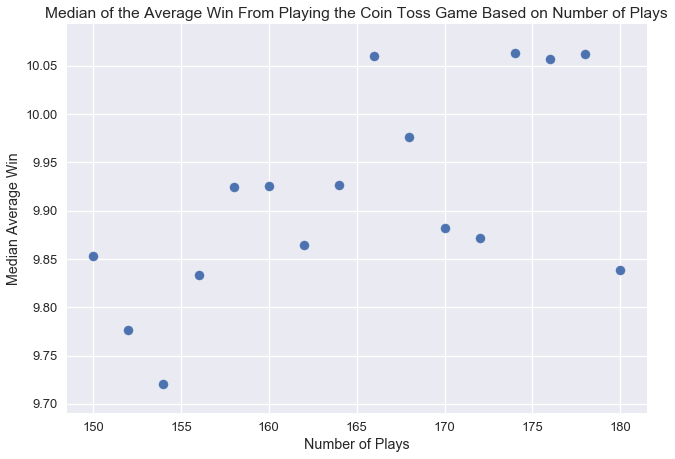

In [499]:
plt.scatter(x2, y2)
plt.title('Median of the Average Win From Playing the Coin Toss Game Based on Number of Plays')
plt.xlabel('Number of Plays')
plt.ylabel('Median Average Win')
plt.show()

Here we can see the number of plays at which the median average win cross 10 dollars. It seems to be somewhere around 170.